# Prolexitim NLP Analytics 
## TAS-20 & Text Data. Predictive Analysis with Embeddings
### Deep Learning - Classification - Word Embeddings (Word2Vec, Doc2Vec)
<hr>
<b>Dataset from Prolexitim TAS-20 Spain instrument and Prolexitim NLP.</b><br>
<b>Text Analytics uing Prolexitim NLP texts.</b>
<hr>
May 2019.<br> Prolexitim normalized dataset version 1.3 (MPGS-TFM-Submission).<br> 
Raúl Arrabales Moreno (Psicobótica / Serendeepia Research)<br>
<a target="_blank" href="http://www.conscious-robots.com/">http://www.conscious-robots.com/</a> <br>
<hr>

## This notebook contains: 

- TAS-20 + NLP Merged Dataset loading.
- Prolexitim NLP Spanish Text Corpus creation and exploration with ntlk
- Word Vectors generation (Word2Vec) using gensim and nltk
- Doc Vectors generation (Doc2Vec) using gensim and nltk
- Aleithymia prediction using Doc2Vec as features for a Logistic Regression Classifier. 

### TAS-20 + NLP Dataset Load

In [1]:
import pandas as pd 

# Load dataset (with text, in English and Spanish)
tasnlp_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-merged-1.3.csv"

tasnlp_df = pd.read_csv(tasnlp_dataset_path,header=0,delimiter="\t")

In [2]:
tasnlp_df.head()

,RowId,code,card,hum,mode,time,G-score,G-magnitude,Azure-TA,Text,...,SClass,Siblings,SibPos,Origin,Resid,Rtime,Ethnic,Job,alex-a,alex-b
0,1,b7adde8a9eec8ce92b5ee0507ce054a4,13V,1,T,200000,-0.2,0.2,0.62,Era un niño pensando en el granero pensando a ...,...,2.0,5.0,3.0,ES,ES,-1.0,Iberic,Manager,NoAlex,NoAlex
1,2,b7adde8a9eec8ce92b5ee0507ce054a4,18NM,2,T,200000,-0.5,0.5,0.41,"Una madre que está consolando a su hijo, despu...",...,2.0,5.0,3.0,ES,ES,-1.0,Iberic,Manager,NoAlex,NoAlex
2,3,b7adde8a9eec8ce92b5ee0507ce054a4,12VN,0,T,200000,0.0,1.2,0.63,Un pantanal con una barca abandonada. A ver qu...,...,2.0,5.0,3.0,ES,ES,-1.0,Iberic,Manager,NoAlex,NoAlex
3,4,76ef63369f7d5b6597a543017e1ef578,12VN,0,T,200000,0.0,0.1,0.89,"Era un paraje muy bonito, con una barca, un po...",...,2.0,3.0,3.0,ES,ES,-1.0,Iberic,Retired,Alex,Alex
4,5,76ef63369f7d5b6597a543017e1ef578,10,2,T,200000,0.3,0.1,0.24,"Era una vez un matrimonio, que se quería muchí...",...,2.0,3.0,3.0,ES,ES,-1.0,Iberic,Retired,Alex,Alex


In [3]:
tasnlp_df.dtypes

RowId              int64
code              object
card              object
hum                int64
mode              object
time               int64
G-score          float64
G-magnitude      float64
Azure-TA         float64
Text              object
Text-EN           object
nlu-sentiment    float64
nlu-label         object
nlu-joy          float64
nlu-anger        float64
nlu-disgust      float64
nlu-sadness      float64
nlu-fear         float64
es-len             int64
en-len             int64
NLP              float64
TAS20            float64
F1               float64
F2               float64
F3               float64
Tas20Time        float64
Sex              float64
Gender           float64
Age              float64
Dhand            float64
Studies          float64
SClass           float64
Siblings         float64
SibPos           float64
Origin            object
Resid             object
Rtime            float64
Ethnic            object
Job               object
alex-a            object


## Prolexitim NLP Spanish Text Corpus creation and exploration with ntlk

In [36]:
import nltk

In [ ]:
# Get all text documents in a nltk corpus
tas_corpus = []

# Use Spanish tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')

# For all narratives in Spanish in the dataset
for index, row in tasnlp_df.iterrows():  
    # tokenize the sentences into words 
    # tokens = nltk.word_tokenize(row["Text"]): 
    tokens = tokenizer.tokenize(row["Text"])
    text = nltk.Text(tokens)
    tas_corpus.append(text)

In [ ]:
# Check corpus: 
print(tas_corpus.raw().strip())

In [ ]:
print(tas_corpus.paras())

In [ ]:
print(tas_corpus.paras(tas_corpus.fileids()[0]))

In [ ]:
print(tas_corpus.sents())

In [ ]:
print(tas_corpus.words())

## Word Vectors generation using Word2Vec and nltk

In [14]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\array\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [5]:
warnings.filterwarnings(action = 'ignore') 

In [7]:
!pip install gensim

  Stored in directory: C:\Users\array\AppData\Local\pip\Cache\wheels\73\6b\89\bb14fd56b74774a39a771a12f525a6a14c2c2692d3084ad048
  Stored in directory: C:\Users\array\AppData\Local\pip\Cache\wheels\b8\cb\43\c0ba52baf2b0e371ec1d5b2d4685d6d24617b1391f3eeacda5
Successfully built gensim smart-open


In [8]:
import gensim 
from gensim.models import Word2Vec 

### Build CBOW model (Continuous Bag of Words)

In [17]:
data = [] 
temp = [] 

# For all narratives in the dataset
for index, row in tasnlp_df.iterrows():
    # print(row["Text"])
    
    # tokenize the sentences into words 
    for j in word_tokenize(row["Text"]): 
        temp.append(j.lower()) 
        # print(j.lower())
        
    data.append(temp) 

In [20]:
len(data)

334

### Building CBOW and Skip Gram Word2Vec models

With 100 features

In [34]:
# Create CBOW model with 100 features
model_CBOW = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5) 

In [35]:
# Create Skip Gram model with 100 features
model_SGram = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1) 

In [43]:
# Check Cosine similarities 

print("Cosine similarity between 'violín' and 'instrumento' - CBOW : ", 
      model_CBOW.similarity('violín', 'instrumento')) 
      
print("Cosine similarity between 'violín' and 'instrumento' - Skip Gram : ", 
      model_SGram.similarity('violín', 'instrumento')) 

print("Cosine similarity between 'niño' and 'señor' - CBOW : ", 
      model_CBOW.similarity('niño', 'señor'))

print("Cosine similarity between 'niño' and 'señor' - Skip Gram : ", 
      model_SGram.similarity('niño', 'señor')) 

print("Cosine similarity between 'niño' and 'matrimonio' - CBOW : ", 
      model_CBOW.similarity('niño', 'señor'))

print("Cosine similarity between 'niño' and 'matrimonio' - Skip Gram : ", 
      model_SGram.similarity('niño', 'señor')) 

print("Cosine similarity between 'niño' and 'toros' - CBOW : ", 
      model_CBOW.similarity('niño', 'señor'))

print("Cosine similarity between 'niño' and 'toros' - Skip Gram : ", 
      model_SGram.similarity('niño', 'señor'))

Cosine similarity between 'violín' and 'instrumento' - CBOW :  0.37614313
Cosine similarity between 'violín' and 'instrumento' - Skip Gram :  0.32931256
Cosine similarity between 'niño' and 'señor' - CBOW :  0.20347899
Cosine similarity between 'niño' and 'señor' - Skip Gram :  0.1893035
Cosine similarity between 'niño' and 'matrimonio' - CBOW :  0.20347899
Cosine similarity between 'niño' and 'matrimonio' - Skip Gram :  0.1893035
Cosine similarity between 'niño' and 'toros' - CBOW :  0.20347899
Cosine similarity between 'niño' and 'toros' - Skip Gram :  0.1893035


### Save Word2Vec models to disk


In [ ]:
models_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\"

In [42]:
model_SGram.wv.save_word2vec_format( models_path + "Word2Vec_SGram_1-3.bin", binary=True)
model_SGram.save( models_path + "Word2Vec_SGram_1-3.model")
model_CBOW.wv.save_word2vec_format( models_path + "Word2Vec_CBOW_1-3.bin", binary=True)
model_CBOW.save( models_path + "Word2Vec_CBOW_1-3.model")

## Training a Doc2Vec model

inspired from: https://towardsdatascience.com/implementing-multi-class-text-classification-with-doc2vec-df7c3812824d 

In [52]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [55]:
import nltk
from nltk.corpus import stopwords

In [46]:
import multiprocessing
cores = multiprocessing.cpu_count()
print(cores)

8


In [49]:
docs = tasnlp_df[['Text','alex-a']]
docs = docs.dropna()
docs.count()

Text      318
alex-a    318
dtype: int64

In [106]:
# Train/test partition sizes

test_size = int(round(docs.count()[0]/10))
train_size = docs.count()[0] - train_size
print(f'Training with {train_size} exemplars, and testing with {test_size} exemplars.')

Training with 286 exemplars, and testing with 32 exemplars.


In [107]:
# Join alexithymia and possible alexithymia as one positive class

docs['alex-a'] = docs['alex-a'].apply(lambda x: x.replace('PosAlex', 'Alex'))
docs.groupby('alex-a').count()

,Text
alex-a,
Alex,76
NoAlex,242


In [93]:
# Shuffle dataset
import sklearn.utils
docs = sklearn.utils.shuffle(docs)
# docs

In [71]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [108]:
train_documents = []
test_documents = []

# Associating the tags(labels) with numbers
tags_index = {'Alex': 1 , 'NoAlex': 0}

for index,row in docs.head(n=train_size).iterrows():
    train_documents.append(
        TaggedDocument(words=tokenize_text(row['Text']), tags=[tags_index.get(row['alex-a'], 8)] ))

for index,row in docs.tail(n=test_size).iterrows():
    test_documents.append(
        TaggedDocument(words=tokenize_text(row['Text']), tags=[tags_index.get(row['alex-a'], 8)] ))


In [110]:
print(str(len(train_documents)))
print(str(len(test_documents)))
print(train_documents[0])

286
32
TaggedDocument(['un', 'bonito', 'lugar', 'escondido', 'en', 'el', 'bosque', 'pero', 'de', 'difícil', 'acceso', 'por', 'sus', 'piedras', 'mojadas', 'resbaladizas', 'por', 'su', 'impresionante', 'cascada'], [0])


In [116]:
model_dbow = Doc2Vec(dm=1, vector_size=200, negative=5, hs=0, min_count=2, sample = 0, workers=cores, alpha=0.025, min_alpha=0.001)


In [117]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar") 

model_dbow.build_vocab([x for x in tqdm(train_documents)])
model_dbow.train(train_documents, total_examples=len(train_documents), epochs=30)

100%|████████████████████████████████████████████████████████████████████████████████████████| 286/286 [00:00<?, ?it/s]


In [118]:
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, feature_vectors

In [120]:
model_dbow.save( models_path + "Doc2Vec_DBoW_1-3.d2v")

In [121]:
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, feature_vectors

In [124]:
y_train, X_train = vector_for_learning(model_dbow, train_documents)
y_test, X_test = vector_for_learning(model_dbow, test_documents)

In [126]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Area Under the Curve (ROC) %s' % roc_auc_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.71875
Area Under the Curve (ROC) 0.5705128205128205
Testing F1 score: 0.7268099547511312


In [132]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

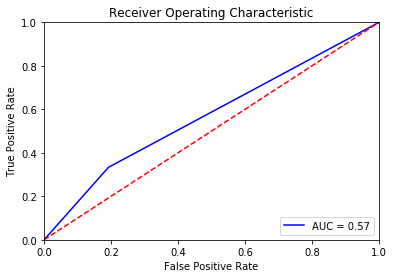

In [133]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()